---
title: Social Finance
subtitle: Online appendix and notes
exports:
  - format: pdf
    template: springer
    output: exports/socfin_m.pdf
abstract: |
  Derivations and code for graphs.
---


*This is a Jupyter Notebook to accompany the paper. It runs through the model with detailed derivations and describes the python code used to generate the graphs.*

A web-based version of this notebook at jhconning.github.io/social-finance 

**Abstract:**  We propose a framework for understanding how social investors’ who seek to maximize a combination of private and social returns from investments in a portfolio of new and established microfinance institutions.  The model takes into account the endogeneity of loan contract terms as well as the capital structure of the financial institutions that may emerge to serve target groups of borrowers differentiated primarily by their levels of initial average net worth, and how social investments might transform those patterns. We build upon one of the workhorse models of modern corporate finance (Tirole, 2007) which features limited liability, multiple layers of moral hazard and costly monitoring to explain patterns of financial intermediation, and in our framework, the role and modes of social investment.  We pinpoint the role of the subsidies and guarantees implicit in social investors’ equity and quasi-equity investments and the role they play in attracting private capital investors and sustaining productivity-enhancing financial intermediation that might otherwise not have taken place. 

# Introduction

...We tackle the logic and tensions inherent in social finance—the support, with philanthropic objectives, of nonprofits, social businesses like the Grameen Bank, and profit-maximizing businesses serving the poor. The principles behind the new world of philanthropy and social action have not been well-explored by economists. We develop a theory of “social finance” to parallel the modern theory of corporate finance... 


We extend a model of capital constraints and financial intermediation with active monitors similar to Holmstrom and Tirole (1997), Conning (1999), but extends the model to focus on how bank capital structure varies across banks depending on the monitoring-intensity of their loan portfolio (determined in turn by the average net worth of its borrowers) and the role that social investors may play in creating and expanding loan access via structured finance. 

This model itself is built upon a simple model of credit rationing due to borrower moral hazard and limited liability, the 'workhorse' model of Tirole's (2006) *The Theory of Corporate Finance*.  Risk-neutral entrepreneurs have access to an investment project which requires a lump-sum investment $I$ to get started, but they do not have liquid funds so they seek to borrow the entire amount from financial intermediaries. The problem of moral hazard will dictate that optimal contracts must reward project success more highly than project failure in order to give entrepreneurs an incentive to want to increase the probability of success.  Under many plausible parameter scenaries te optimal contract will require that loan repayments in the failure state(s) be met out of assets that are additional or 'collateral' to the generated project returns.  Lenders will find it unprofitable to lend to any borrower who cannot credibly pledge assets below a minimum collateral requirement $\underline A$.  A simple graphical analysis of this collateral based lending model is laid out in a notebook [here](basicmodel.ipynb)

Local intermediaries may be able in 'active monitoring' that directly lowers borrowers' scope for moral hazard, lowering the minimum collateral requirements necessary to attract outside investors, thereby expanding capital access.  But monitoring is a costly activity that is itself subject to moral hazard. For this reason an optimal contract will require monitoring intermediaries to have enough of their own capital at risk in a loan so as to provide incentives to appropriately monitor to protect any outside investor's interests. 

In contrast to the earlier mentioned papers, in this paper we posit the idea that local intermediary monitoring capacity is neighborhood-specific, and neighborhoods are largely segregated by the average level of pledgeable assets of its residents.  This leads us to a focus on the optimal capital structure of neighborhood-specific banks (or more broadly to the optimal capital structure of different types of banks, depending on the monitoring intensity of their loan portfolio). 

There are up to four types of agents in the model:

1. risk-neutral entrepreneur households that can run small businesses if they are able to cover lump sum $I$. Household differ in terms of their initial pledgeable assets $A$ (tied up in other projects but can be liquidated at a cost to cover obligations. 
2. one or more local financial intermediaries in each neighborhood, wholly or partly owned and managed by locally informed equity investors. These financial institutions may lend out of their own equity capital. Their own at risk investment in a particular entreprenneur's project is labeled $I^m$ to indicate that they monitor to try to limit scope for moral hazard.
3. private uninformed investors (possibly including savings depositors). 
4. Finally, social investors may be able to affect the nature and depth of the above relationsips through additional investments, subsidies and guarantees of their own. 

Entrepreneurs in neighborhood $j$ have pledgeable assets $A_j$ (assets that are tied up in other productive uses but could be liquidated to pay off a loan).  Depending on the characteristics of the loan projects and the level of $A_j$ the model generates one of four types of lending structures: 

Depending on their initial holding of $A$ and parameters of the problem, entrepreneurs will in the end be either:
1. not funded
2. funded only by a non-leveraged local intermediary, so $I = I^m$
3. funded by a leveraged intermediary: so $I = I^m + I^u$

The model can be closed so that, depending on the characteristics of loans, the initial distribution of pledgeable assets across neighborhoods and entrepreneurs,  and the economy-wide levels of intermediary and uninformed capital we can predict the rate of return on uninformed and intermediary capital as well as bank capital structure and loan terms across the population.



### Model code

Many of the functions used to simulate and visualize the model below are written up in python in a [socialfinance](socialfinance.py) module.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from socialfinance import Bank

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.rcParams['figure.figsize'] = (7.5, 5.5) 
plt.rcParams['text.usetex'] = True

## Model parameters

We imagine a continuum of neighborhoods indexed by the level of pledgeable assets $A$ of its residents. We order these from low to high values. 

An `mfi` or microfinance institution serves the neighborhood.  Represented as a `Bank` object in the code.

In [3]:
A = np.linspace(0, 150, 500)   
mfi = Bank(A, beta = 1.2)
mfi.print_params()    

Amax = 140, B0 = 30, F = 0, I = 100, K = 12000, X = 200, alpha = 0.5, beta = 1.2, f = 30, gamma = 1.0, p = 0.97, q = 0.82


**Intermediary fixed cost per borrower**

The model allows for the possibility of fixed costs per loan $f$ and fixed costs per bank $F$, but we'll start by setting these fixed costs to zero.

**Monitoring technology:** We assume a simple linear relationship betweeen monitoring intensity $m$ (=monitoring expense) and the extent of moral hazard as captured by the  private benefits $B(m)$ the client stands to capture from non-diligence. 

$$B(m) = B_0 - \alpha \cdot m$$

We don't need to assume a linear relationship -- which implies a constant marginal cost to monitoring -- we could imagine that monitoring is at first falling and then rising marginal cost.  The linear assumption just helps to make the results slightly more stark and easier to derive.

### Neighborhoods, Entrepreneurs and assets 
There are $J$ neighborhoods with $N$ enterepreneurs per neighborhood. The neighborhoods are segregated by pledgeable assets or wealth (and to simplify, everyone in a particular neighborhood has the same level of assets as all their neighbors).  

We assume a uniform distribution across neighborhoods. A household:
 - in the poorest ($j=0$) neighborhood has pledgeable assets $A=0$
 - in the richest neighborhood has $A=A^{max}$
 - in neighborhood $j$ has pledgeable assets $A_j = j \cdot \frac{A^{max}}{J}$

Each of the $N$ would-be entrepreneurs in each of the $J$ neighborhoods has access to a project that, for lump sum investment $I$, produces expected return $p\cdot X_s$.  Total "potential demand," if all projects were funded, is therefore: $\bar{K} = N \cdot J \cdot I$


We assume however that there is not enough local intermediary monitoring capital to satisfy total demand in the neighborhood. This means financial intermediaries must leverate the remaining funds from a larger market for uninformed capital.  Uninformed capital investors will participate as long as they can expect to earn the opportunity cost of funds $r$. 

### Minimum collateral requirements

An entrepreneur's project generates a return $X_s$ with probability $p$ and a return $X_f$ with probability $1-p$.   A financial contract divides the project returns $X_i$ between returns to the monitoring intermediary $R_i$, returns to the entrepreneur $s_i$, and the uninformed lender gets what's left or $X_i-s_i-R_i$.  

#### Minimum collateral for a no-monitoring lender ($m=0$)

An uninformed lender cannot observe whether the entrepreneur has been diligent (chose project $p$) or not (chose project $q$ and got private benefit $B(0)$). They will insist the contract provide incentives to diligence.  That is the contract must satisfy the borrowers incentive compatibility constraint:

$$E(s|p) \ge E(s|q) + B(0)$$

Expanding and regrouping terms we can express this as:

$$s_s  \ge s_f + \frac{B(0)}{p-q}$$

Which is to say that the reward for success must be sufficiently greater than the reward to failure, to provide the entrepreneur with an incentive to choose the high return project.  

If limited liability puts a lower bound on how small of $s_f=-A$ (where $A$ are the entrepreneur's pledgeable assets) then this implies a borrower with pledgeable assets $A$ earns a 'limited liability' rent of: 

$$E(s|p)= -A + p\frac{B(0)}{p-q}$$

Less well-off entrepreneurs with smaller $A$ must earn higher rents to maintain incentives.  Intuitively, since limited liability limits how much they can be punished for failure outcomes, incentives can only be maintained by keeping repayments low in sucess states, but this is costly to the lender, since it means they cannot collect too much in the success state (demand too high of a repayment) without destroying the incentive to choose the high return project.

The lender must be able to cover this rent and her opportunity cost of funds $\gamma I$ and fixed costs per loan $F$ (we assume the latter is paid in the second period, hence not discounted).  For now we indicate fixed costs simply as $F$ but note that we'll later break this into fixed costs at the loan level (e.g. minimum cost of processing a loan, regardless of organization size) and organization-level fixed costs (average fixed costs will decline with organization size).

So a lender will just be able to break even and be willing to participate when the poorest borrower has assets :

$$
E(x|p) - E(s|p) = \gamma \cdot I + F
$$

$$
E(x|p)  + A  - p\frac{B(0)}{p-q} = \gamma \cdot I + F
$$

Solving for the $A$ as a function of $m$ where this exactly holds gives us the **minimum collateral requirement for a no-monitoring or uninformed lender** who has opportunity cost of funds $\gamma$ but cannot monitor.


$$
\underline A^u(0) = \frac{p \cdot B(0)}{p-q} 
 - \left[ {pX - \gamma I -  F} \right]
 $$

If a borrower has pledgeable assets $A$ in excess of the minimum collateral required by an uninformed lender $\underline A(0,N)$ then they'll pledge $\underline A(0,N)$ and borrow entirely from the uninformed lender, so $I = I^u$ and the cost of funds to the borrower in this competitive environment will be $\gamma$  

Entrepreneurs with $A \lt \underline A(0,N)$ have no choice but to try to borrow via a more expensive monitoring local intermediary.

For our particular example: 

In [4]:
f'Minimum collateral requirement for a non-monitored loan AM(0, 1) = {mfi.AM(0):.2f}'

'Minimum collateral requirement for a non-monitored loan AM(0, 1) = 130.00'

This may seem high -- it would seem the bank is asking for \$97 collateral for a \$100 loan, but 'pledgeable assets' might involve partially illiquid assets (e.g. a sofa, a vehicle, or wages that can be garnished) that borrowers in more affluent neighborhoods are likely to have.  As we shall see shortly a borrower who can pledge this much can expect to make a very good return from this relatively low cost loan.

It's the people that cannot pledge this amount who suffer by being denied these relatively low-cost (zero-monitoring loans) who must instead accept higher cost monitoring-intensive loans, or perhaps be denied any type of loan.

#### Minimum collateral for a monitoring lender
A monitoring intermediary has the advantage of being able to monitor to directly lower the scope for moral hazard via $B(m)$ but they charge a higher cost of funds because (a) they face a higher opportunity cost of funds $\beta > \gamma$ and because (b) they must also be compensated for the cost of monitoring $m$.

Monitoring lowers the private benefit from non-diligence:

$$E(s|p)= -A + p\frac{B(m)}{p-q}$$

but monitoring adds a cost that must now be paid for:

$$E(x|p) - E(s|p) = \beta \cdot I + m + F$$

The expression below shows how monitoring intensity $m$ can lower the collateral requirement for a monitoring intermediary when they are the only lender:

**Non-leveraged or Equity-only MFI**

$$
\underline A^e(m) = \frac{p \cdot B(m)}{p-q} - \left[ {pX - \beta I - F} \right]  + m 
$$
 
Note that as monitoring $m$ must be paid for out of available project surplus, which reduces what is left to the entrepreneur after making all necessary repayments. Competition in a competitive market will lead to contracts with the minimum required monitoring, to keep costs to the borrower down.   That is they'll choose a monitoring intensity $m=m(A)$ that brings the monitoring minimum collateral requirement down to match the borrower's available pledgeable assets $A$ and make the loan feasible:

$$\underline A^e(m(A)) = A$$

The derivation of the closed form solutions for $m(A)$ is found below.

**Leveraged MFI**

If the local intermediary MFI can leverage outside capital it can potentially substitute cheaper outside financing for more expensive local intermediary (equity) financing. 

An outside lender will however only participate in a financing structure if it can be sure the monitoring intermediary has enough 'skin in the game' to have incentives to carry out the unobservable monitoring on the loan at this minimum intensity required for expected repayments to cover the uninformed lender's costs.  

A contract allocates claims as $s_i$ to the entrepreneur, $R_i$ to the monitoring lender and $X_i -R_i - s_i$ to the uninformed lender where $i = S, F$.  The monitor's incentive compatibility constraint requires that they earn more from being diligent in monitoring at expense $m$ than from not monitoring:

$$R_s \ge R_f + \frac{m}{p-q} $$

The lowest cost way to satisfy the monitor's incentive constraint (to have it bind) implies leaving a monitoring rent of:

$$E(R|p) = R_f + p \cdot \frac{m}{p-q}$$ 

to the intermediary.  This is analogous to the limited liability rent to the borrower.  

**Scarce Intermediary Capital**

Suppose there is only on intermediary in the neighborhood. Then they will put nothing at risk ($R_f=0$) and earn an economic rent of

$$
p \frac{m}{\Delta p}
$$

Now the 


$$
\underline A^M(m) = \frac{p \cdot B(m)}{p-q} - \left[ {pX - \beta I - F} \right]  +  p \frac{m}{p-q}
$$







**Competition for intermediary services**

Assume instead now there is free entry into intermediation services. in the neighborhood. Intermediaries will now compete to lend to borrowers and leverage outside funds from uninformed lenders by putting up capital of their own.  This is "skin in the game" but it also reduces the rent.  

 Competition will insure that the untermediary earns zero profits (alternatively, we could assume intermediaries have a social mission to reach as many entrepreneurs as possible, and earn zero profits).  If the intermediary puts up $I^m$ of each $I$ loan and takes first losses then they stand to capture $R_f = -\beta I^m$ if the project fails and $R_s = -\beta I^m + \frac{m}{p-q}$ if the project succeeds.  Competition drives intermediary profits down to zero.  The expected returns from the contract (left hand side below) must cover the cost of monitoring $m$ plus the fixed cost per borrower:

$$p \cdot \frac{m}{p-q}  \ge \beta I^m +  m 

We can use this to find the size of the stake (or skin in the game) $I^m$ the monitoring intermediary must have in the project in order to have incentive to monitor:

$$
I^m = \frac{1}{\beta}\frac{q \cdot m}{p-q} 
$$

which is rising with the required amount of monitoring $m$ (to be determined).

The uninformed lender puts up $I^u = I - I^m$ and the monitor puts up $I^m$.  The 'poorest' entrepreneur (i.e. the one with the lowest level of pledgeable assets A that can be reached) will be determined by the contract where what is left of expected project returns after paying the borrower the limited liability rent (required to make sure they choose the high probability of success project) is just enough to pay off both the uniformed and the informed lenders:


$$
E[X|p] - E[s|p] \ge \gamma (I - I_m) + p \frac{m}{p-q} + F
$$


rearranging and using our earlier finding that $\beta I^m + m = p \frac{m}{p-q}$ we can solve for the minimum collateral requirement for the leveraged MFI:

$$
pX + A - p\frac{B(m)}{p-q} = \gamma (I - I^m) + \beta I^m +  f + m
$$

solving for $A$ as a function of $m$:


$$
\underline A (m) = p \cdot \frac{B(m)}{p-q} 
- \left[ {pX - \gamma I} \right] 
+ \frac{\beta - \gamma}{\beta} \left( \frac{q \cdot m}{p-q} \right ) + m + \gamma F
$$


If $\beta=\gamma$ this collapses to the no-leverage minimum collateral requirement above.

If $\beta \gt \gamma$ the premium that must be paid for intermediary capital (even though intermediaries are earning zero rents in this activity) adds to the cost.

## Optimal (minimum required) monitoring

Monitoring is costly so only so much will be used as needed to lower the minimum collateral requirement to the entrepreneur's pledgeable asset level $A$> 

The minimum collateral requirement above can be rewritten as a function where higher monitoring $m$ reduces the collateral requirement from the no-monitoring collateral level. Using the fact that $B(m) = B(0) - \alpha m$ we can write the minimum collateral requirement as a function of monitoring intensity $m$ as:

$$\underline A (m) = \underline A (0) 
  - m \left [ p \cdot \frac{\alpha}{p-q} - \frac{(\beta - \gamma)}{\beta} \left( \frac{q}{p-q} \right ) -1 \right ]$$

Which means we can solve $\underline A (m) = A$ for _the minimum monitoring intensity_ for a borrower with pledgeable assets $A$:

$$m(A) = \left[ \underline A(0)  - A \right] \cdot
    \frac{\beta(p-q)}{\beta p(\alpha - 1)+\gamma q}$$

If the entrepreneus can only access an equity-only lender (i.e. $I^m=I$):  [CHECK THIS]

$$\underline A^e(m) = A$$

where $\underline A^e(m) =  p \cdot \frac{B(m)}{p-q} - \left[ {pX - \beta I} \right] + m + \beta F$



Solve for $m$ to get:

$$m^e(A) = \left[ \underline A^e(0)  - A \right] \cdot
    \frac{(p-q)}{ p(\alpha-1)+ q}$$
    
And when $\beta=\gamma$ these two expressions become identical.

In this competitive setting the lender(s) earns zero profits. But the borrower will only participate if they can expect a positive return (borrower participation constraint). This determines the maximum feasible level of monitoring.  

$$
p \cdot X - \beta \cdot I -  F - m \ge 0
$$

$$m^{max} = p  \cdot X -\gamma I - F$$

The two lines cross at $\underbar A(m, \beta) = AME(m, β) or at:

$$\bar m =  \frac{\beta(I+F)(p-q)}{q}$$

So any entrepreneur with $A<AM(\bar m)$ would be in an equity-only loan.

At zero monitoring it's obviously cheaper to use uninformed capital which has lower cost $\gamma$ rather than borrow from an local intermediary capital which has opportunity cost $\beta$.  Since the latter type of loans are more expensive, they'll also be associated with higher minimum collateral requirements.  Suppose $\beta = 1.2 \cdot \gamma$, then:

In [5]:
mfi.print_params()

Amax = 140, B0 = 30, F = 0, I = 100, K = 12000, X = 200, alpha = 0.5, beta = 1.2, f = 30, gamma = 1.0, p = 0.97, q = 0.82


In [6]:
mfi.beta = 1.2
print('Ame(0) = {:5.1f}  Am(0) = {:5.1f} '.format(mfi.AMe(0), mfi.AM(0)))
print('mcross = {:5.1f}   mmax = {:5.1f}   Amin = {:5.1f}'.format(mfi.mcross(),mfi.mmax(), mfi.Amin()))

Ame(0) = 150.0  Am(0) = 130.0 
mcross =  22.0   mmax =  44.0   Amin =  51.7


In [7]:
mfi.mmax()

44.0

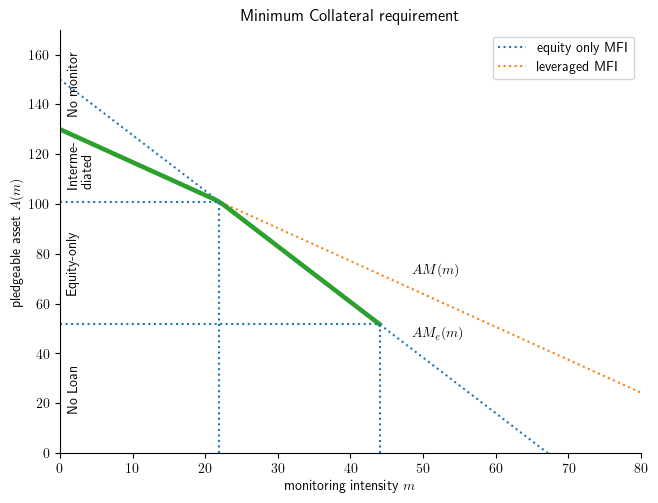

In [8]:
#| label: fig-A
mfi.plotA()

(NOTE the following expression assume F= 0)
For any entrepreneur with pledgeable assets $A$ we can find optimal (minimum) amount of monitoring):

$$\underline A^e(m) = A$$
solve for $m$ to get:
 


$$m(A) = \left[ \underline A^e(0)  - A \right] \cdot
    \frac{(p-q)}{ p(\alpha-1)+ q}$$
    
    

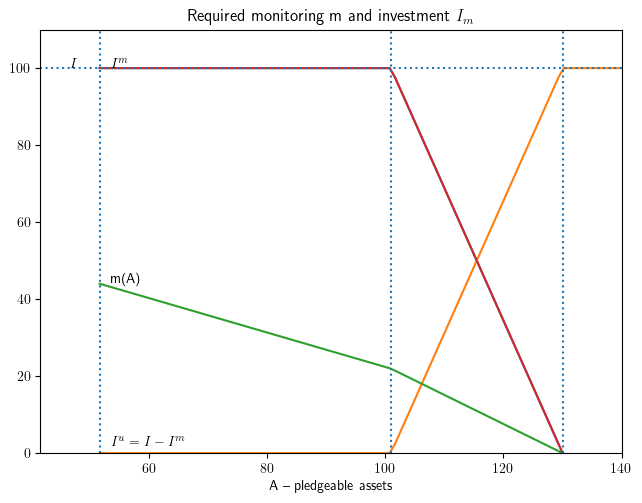

In [39]:
#| label: fig-rmonitoring
mfi.plotIm()


In [38]:
mfi.AM(0), mfi.AM(0)

(129.99999999999997, 129.99999999999997)

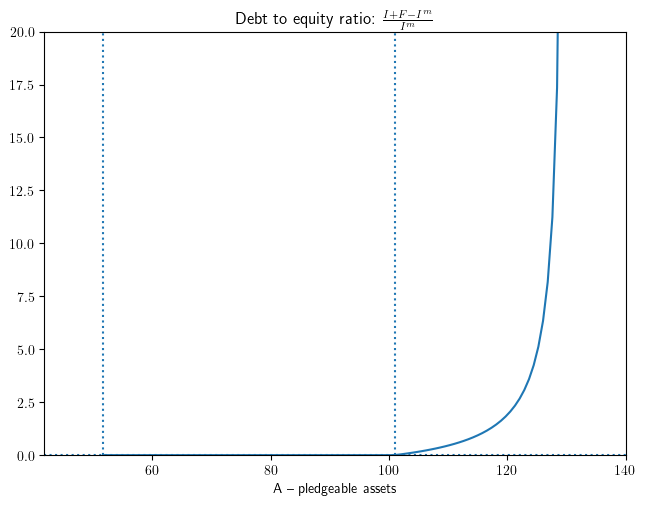

In [36]:
mfi.plotDE(mfi.beta);

## The borrower/entrepreneur's expected return

Is what is left after all others have been paid. 

If it is an equity only loan then the expected return is:

$$E(s|p) = pX - \beta \cdot I  - \beta F  - m^e(A)$$



If it's a leveraged loan then the expected return is:

$$E(s|p) = pX - \gamma \cdot I  - \gamma F  - m(A) \left ( 
  1 + \frac{\beta-\gamma}{\beta} \frac{q}{p-q} 
 \right )  $$

In [12]:
beta, gamma, p, q = mfi.beta, mfi.gamma, mfi.p, mfi.q   
(1+ (beta - gamma) * q / (beta * (p - q))) 

1.9111111111111108

## The effect of subsidizing fixed costs

Here we study the effects of a subsidy to fixed costs.  We can predict the following four impacts or transformations. Where G


| Impact Group | Definition   | notes   |
|------        |------        |-----    |
|  A  | Group 1 --> Group 2 |  new MFIs where none before |
|  B  | Group 2 --> Group 2 |  support existing MFIs , no new leverage |
|  C  | Group 2 --> Group 3 |  transform equity-only to leveraged MFI |
|  D  | Group 3 --> Group 3 or 4 |  increase leverage at already leveraged |





where the original groups are:

|Group  | Definition    |
| ------------- |-------------|
| 1             | no lending |
| 2             | equity-only MFI  | 
| 3             | leveraged MFI   |   
| 4             | direct banking    |  


Let us look at the effect of a fixed cost subsidy (reduce F = 30 to F = 10) on borrower returns.

### Subsidy impact on return to borrower:

Let's first look at the borrower return by pledgeable assets level $A$.  Borrowers with more pledgeable assets capture more of the project returns $EX -\gamma I - F$. That's because part of the surplus goes to monitoring (or rents) for lower $A$ borrowers.

In [13]:
br1 = mfi.breturn(A)       # borrower return in MFIs with F=20
mfi2 = Bank(A, mfi.beta)             
mfi2.f = mfi.f - 10
br2 = mfi2.breturn(A)     # borrower return in MFIs with F=10a

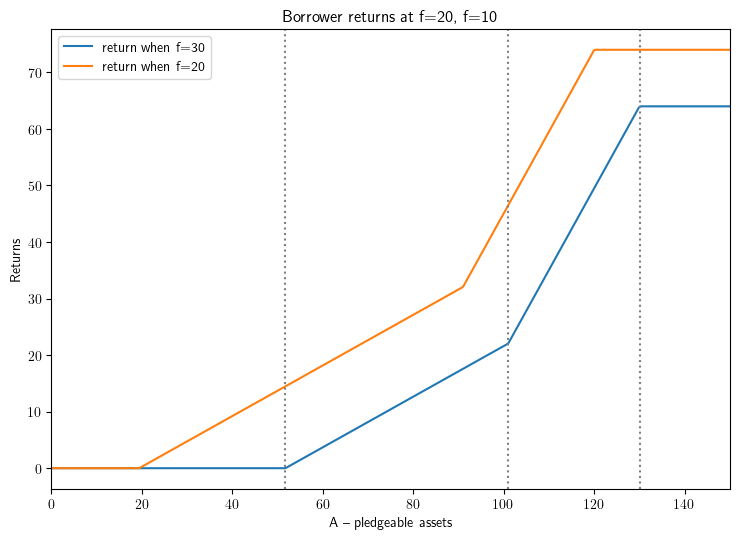

In [14]:
#| label: fig-brcompare
plt.plot(A, br1, label=f'return when f={mfi.f}')
plt.plot(A, br2, label=f'return when f={mfi2.f}')
plt.title('Borrower returns at f=20, f=10')
plt.xlabel('A -- pledgeable assets')
plt.ylabel('Returns')
plt.axvline(x=mfi.Amin(), linestyle=':', color='grey')
plt.axvline(x=mfi.Across(), linestyle=':', color='grey')
plt.axvline(x=mfi.AM(0), linestyle=':', color='grey')
plt.legend()
plt.tight_layout()
plt.xlim(0, max(A));


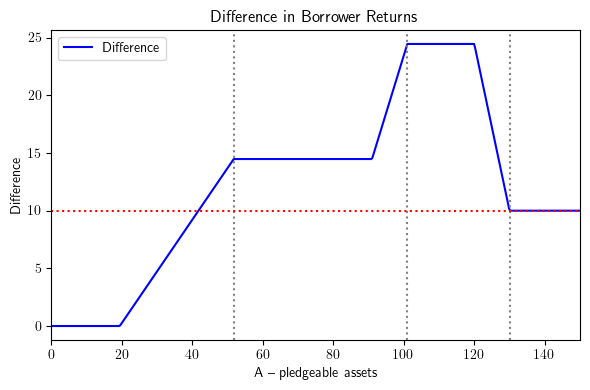

In [15]:
#| label: fig-brdiff
plt.figure(figsize=(6, 4))
plt.plot(A, br2-br1, label='Difference', color='blue')
plt.title('Difference in Borrower Returns')
plt.xlabel('A -- pledgeable assets')
plt.ylabel('Difference')
plt.axvline(x=mfi.Amin(), linestyle=':', color='grey')
plt.axvline(x=mfi.Across(), linestyle=':', color='grey')
plt.axvline(x=mfi.AM(0), linestyle=':', color='grey')
plt.axhline(y=mfi.f-mfi2.f, linestyle=':', color='red')  # dashed line at subsidy level (20=20-10)
plt.legend()
plt.tight_layout()
plt.xlim(0, max(A));


**Analysis:**  

| Impact Group | description   | notes |
|------        |------        |-----    |
|  A  | previously excluded borrowers | only those with higher A get benefits > subsidy |
|  B  | existing no-leverage borrowers | benefit>subsidy|
|  C  | borrowers in transformed MFI |  leverage gives extra kick to subsidy, increasing with A |
|  D  | leveraged to direct borrowing|  impact greater than subsidy but declining with A|
|  E  | Group 4 --> Group 4 |  subsidy passed through 1 for 1 |


### Subsidy impact on number of borrowers:

We are looking at fixed-cost per loan F.  

$$ N = \frac{K}{I^m +F} $$

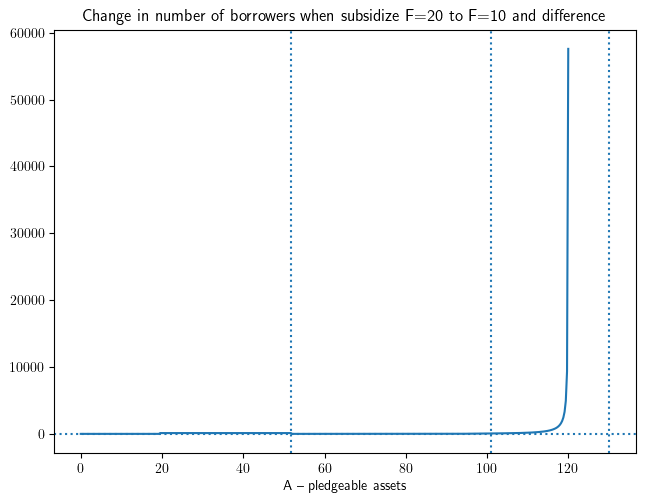

In [16]:
nr1 = mfi.nreach(A)       #number borrowers in MFIs with F=20
nr2 = mfi2.nreach(A)      #number borrowers in MFIs with F=10

#plt.plot(A,nr1)
#plt.plot(A,nr2)
plt.plot(A, nr2-nr1)                   # change in borrower return
plt.title('Change in number of borrowers when subsidize F=20 to F=10 and difference')
plt.xlabel('A -- pledgeable assets')
plt.axvline(x=mfi.Amin(), linestyle =':')
plt.axvline(x=mfi.Across(), linestyle =':')
plt.axvline(x=mfi.AM(0), linestyle =':')
plt.axhline(y=mfi.F-mfi2.F,linestyle=':');     # dashed line at subsidy level (20=20-10)

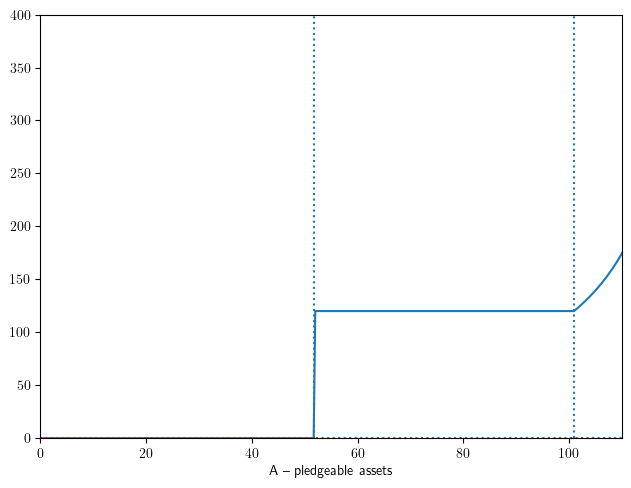

In [17]:
nr1 = mfi.nreach(A)
plt.plot(A,nr1)
#plt.plot(A,nr2)
plt.xlabel('A -- pledgeable assets')
plt.xlim(0,110), plt.ylim(0,400)
plt.axvline(x=mfi.Amin(), linestyle =':')
plt.axvline(x=mfi.Across(), linestyle =':')
plt.axvline(x=mfi.AM(0), linestyle =':')
plt.axhline(y=mfi.F-mfi2.F,linestyle=':');     # dashed line at subsidy level (20=20-10)

Analysis:  Recall that K = 12000.  So a non-leveraged lender can reach $N = 12000/(100+F)$.  When $F=20$ they can reach 100 borrowers. When $F=10$ they can reach 109 borrowers. 

**Analysis:**  

| Impact Group | description   | notes |
|------        |------        |-----    |
|  A  | previously excluded borrowers | 109 new borrowers in each of these new MFIs |
|  B  | existing no-leverage borrowers | just 9 new borrowers per MFI |
|  C, D  | borrowers in transformed MFI |  increase leverage gets many new, increasing with A |


note: need to explain/fix weird small dip at end.